In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#leggo i dataset contenenti i film con relativi id,nomi e generi
movies_df = pd.read_csv('dataset/ml-1m/movies.dat',
                        delimiter='::', engine= 'python', header=None,
                        names=['movie_id','movie_name', 'genre'], encoding='latin-1')
movies_df.head()


,movie_id,movie_name,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
#leggo i dataset contenenti i rating con relativi userId,movie_id e rating e timestamp
ratings_df=pd.read_csv('dataset/ml-1m/ratings.dat',delimiter='::', engine= 'python', header=None,
    names=['userId', 'movie_id', 'rating','timestamp'], encoding='latin-1')
ratings_df.head()

,userId,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
print("Movies:",movies_df.shape)
print("Ratings:",ratings_df.shape)

Movies: (3883, 3)
Ratings: (1000209, 4)


In [4]:
#unisco i dataframe precedenti
movies_merged_df=movies_df.merge(ratings_df, on='movie_id')
movies_merged_df.head()

,movie_id,movie_name,genre,userId,rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [5]:
#associo ad ogni flilm il suo rating medio
movies_average_rating=movies_merged_df.groupby('movie_name')['rating'].mean().sort_values(ascending=False).reset_index().rename(columns={'rating':'Average Rating'})
movies_average_rating.head()

,movie_name,Average Rating
0,Ulysses (Ulisse) (1954),5.0
1,Lured (1947),5.0
2,Follow the Bitch (1998),5.0
3,Bittersweet Motel (2000),5.0
4,Song of Freedom (1936),5.0


In [6]:
#associo ad ogni film il numero di rating ricevuto
movies_rating_count=movies_merged_df.groupby('movie_name')['rating'].count().sort_values(ascending=True).reset_index().rename(columns={'rating':'Rating Count'}) #ascending=False
movies_rating_count_avg=movies_rating_count.merge(movies_average_rating, on='movie_name')
movies_rating_count_avg.head()

,movie_name,Rating Count,Average Rating
0,Another Man's Poison (1952),1,4.0
1,Night Tide (1961),1,2.0
2,Shadows (Cienie) (1988),1,1.0
3,"McCullochs, The (1975)",1,1.0
4,Anna (1996),1,4.0


In [7]:
#associo ad ogni utente il numero di rating effettuato
users_rating_count=movies_merged_df.groupby('userId')['rating'].count().sort_values(ascending=True).reset_index().rename(columns={'rating':'Rating Count'})
users_rating_count.head()

,userId,Rating Count
0,947,20
1,4068,20
2,2530,20
3,341,20
4,5258,20


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 1)
plt.rcParams["axes.grid"] = False



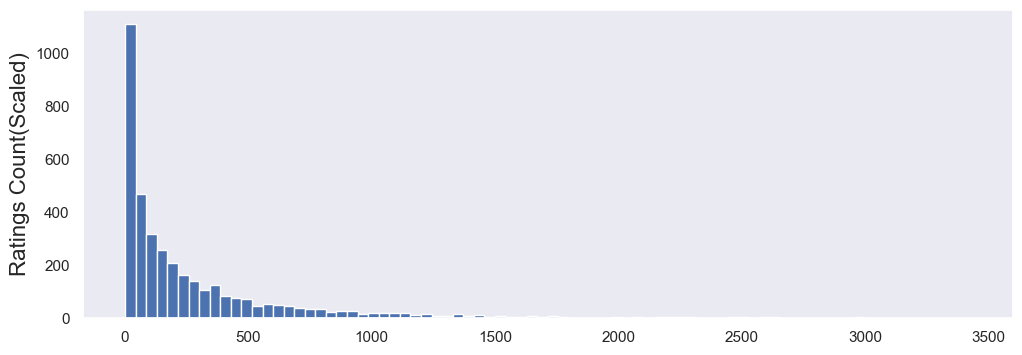

In [28]:
#stampo la distribuzione del numero di valutazioni per film
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Rating Count'],bins=80)
plt.ylabel('Ratings Count(Scaled)', fontsize=16)
plt.savefig('img/ratingcounthist.jpg')

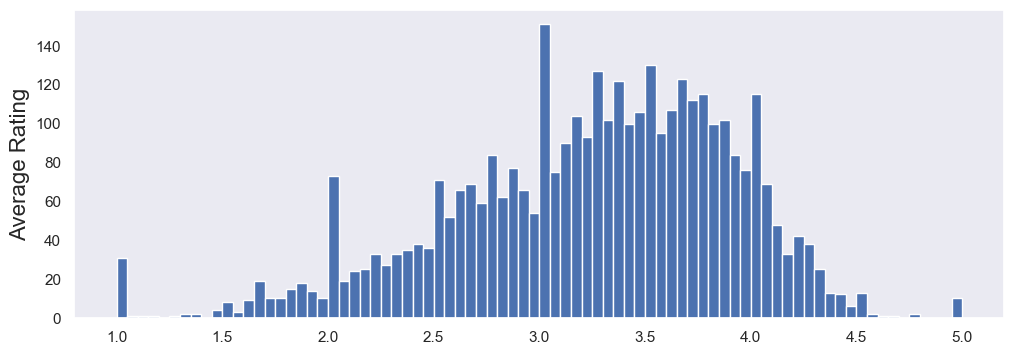

In [29]:
#stampa la distribuzione del valore di ranking sui film
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Average Rating'],bins=80)
plt.ylabel('Average Rating',fontsize=16)
plt.savefig('img/avgratinghist.jpg')

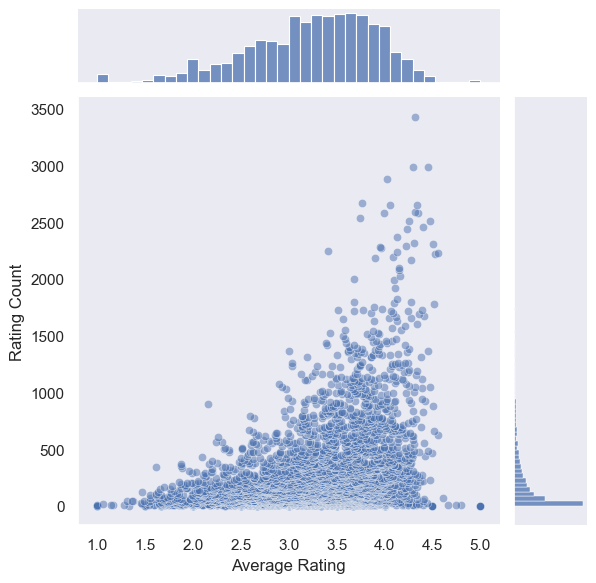

In [30]:
plot=sns.jointplot(x='Average Rating',y='Rating Count',data=movies_rating_count_avg,alpha=0.5)
plot.savefig('img/joinplot.jpg')

C:\Users\Elia\AppData\Local\Temp\ipykernel_13220\1098238540.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


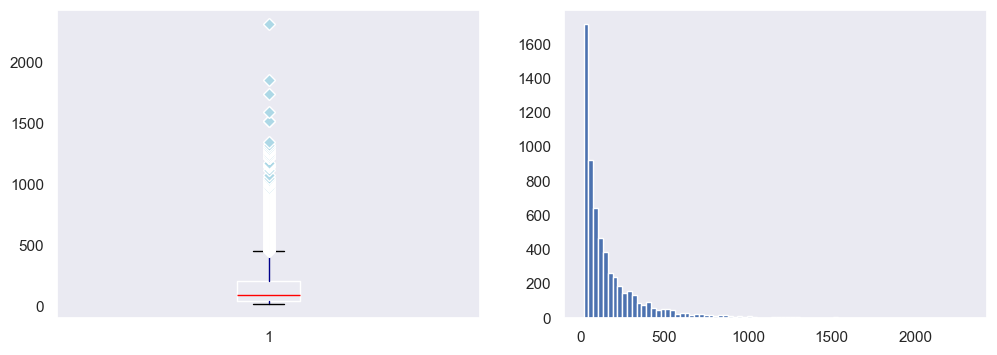

In [46]:
#stampo il box-plot del numero di valutazioni eseguite dagli utenti e la loro distribuzione
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
box_colors = {
    'boxes': 'lightblue',
    'whiskers': 'darkblue',
    'medians': 'red',
    'caps': 'black'
}
ax1.boxplot(users_rating_count['Rating Count'],flierprops=dict(markerfacecolor='lightblue', marker='D'),
            whiskerprops=dict(color=box_colors['whiskers']),
            medianprops=dict(color=box_colors['medians']),
            capprops=dict(color=box_colors['caps']))
ax2.hist(users_rating_count['Rating Count'],bins=80)
fig.show()
plt.savefig('img/avg_user_rating_count.jpg')

In [14]:
x=ratings_df.get(["userId","movie_id","rating"])
x.head()

,userId,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [43]:
#creo la matrice user-item i cui valori sono rating assegnati che ssarà usata da tuttti i modelli di collaborative filtering
user_item_df=movies_merged_df.pivot_table(index = "userId", columns = "movie_name", values = "rating").fillna(0)
user_item_df.head()

movie_name,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [48]:
sc = StandardScaler()
user_item_standardizzata=sc.fit_transform(user_item_df)

In [49]:
#faccio la PCA del dataset considerando 2 PC per visualizzare gli utenti
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(user_item_standardizzata)

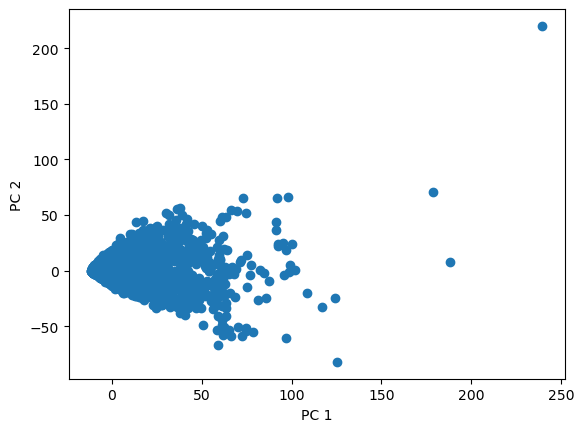

In [50]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [47]:
from sklearn.manifold import TSNE

In [51]:
tsne= TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(user_item_standardizzata)

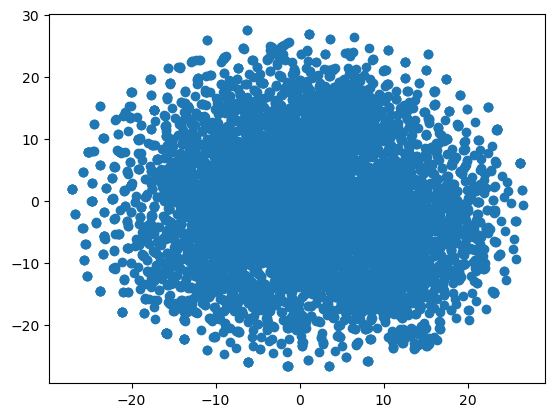

In [52]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

In [54]:

item_user=user_item_df.transpose()
item_user.head()

userId,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
movie_name,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Night Mother (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...And Justice for All (1979),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
#faccio la Principal Component Analysis del dataset considerando 2 PC per visualizzare i film
sc.fit_transform(item_user)
item_user_standardizzata=sc.fit_transform(item_user)
X_train_pca2 = pca.fit_transform(item_user_standardizzata)

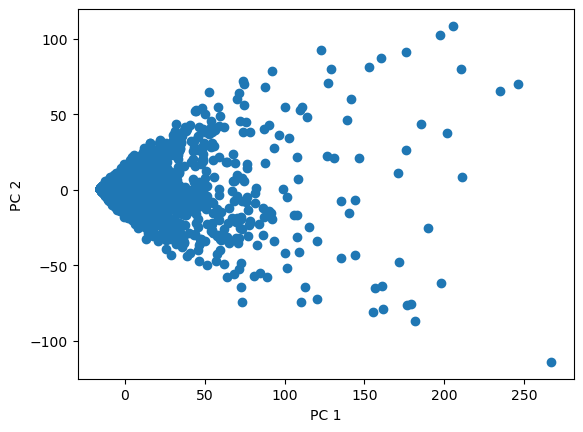

In [56]:
plt.scatter(X_train_pca2[:, 0], X_train_pca2[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()